In [ ]:
# Data processing
import pandas as pd

#Train and Test split
from sklearn.model_selection import train_test_split

#Libraries for visualisation
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import seaborn as sns

#Classification
from sklearn.svm import SVC

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

from google.colab import drive

**Function that draw the Confusion Matrix - using 'ConfusionMatrixDisplay'**


This function takes the true labels (y), predicted labels (predict), and the classification model (model) as inputs. It computes the confusion matrix based on these inputs and then displays it using matplotlib. The function assumes that the labels are binary and uses the labels 'Not purchased' and 'purchased' for display purposes


In [ ]:
def confusion_matrix_print(y, predict, model):
    cm = confusion_matrix(y, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased','Purchased'])
    disp.plot()
    plt.show()

**Function that Visualise 3D linear SVM**

Thins done using numpy and plotly.graph_objs libraires
This method visualizes a decision boundary for a 3D dataset by plotting the data points along with a surface representing the decision function of a trained model.

In [ ]:
def visualise(X_train,y_train):

  z = lambda x,y: (-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y) / model.coef_[0][2]

  xm, xM = X_train[:,0].min(), X_train[:, 0].max()
  ym, yM = X_train[:,1].min(), X_train[:, 1].max()
  x = np.linspace(xm, xM, 10)
  y = np.linspace(ym, yM, 10)
  x, y =np.meshgrid(x, y)

  my_colorscale= [[0, 'rgb(230,230,230)'], [1, 'rgb(230,230,230)']]
  # Ploting.
  fig = go.FigureWidget()
  fig.add_surface(x=x, y=y, z=z(x,y), colorscale='Greys', showscale=False)
  fig.add_scatter3d(x=X_train[y_train==0,0], y=X_train[y_train==0,1], z=X_train[y_train==0,2], mode='markers', marker={'color': 'blue'}, name="Not purchased")
  fig.add_scatter3d(x=X_train[y_train==1,0], y=X_train[y_train==1,1], z=X_train[y_train==1,2], mode='markers', marker={'color': 'red'}, name="Purchased")
  fig.update_layout(width=800, height=800)
  fig.show()

-----------------------------------
**Importing Data**

Read the dataset and show the first 5 rows

In [ ]:
ads = pd.read_csv('Colab Notebooks/Social_Network_Ads.csv')
ads.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Drop the ID attribute as it has no usefult point in the data
ads.drop('User ID',axis=1,inplace=True)
ads.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


--------------------------------------------
**The distribution of dataset**

using matplotlib library  for creating static, animated, and interactive visualizations in Python.

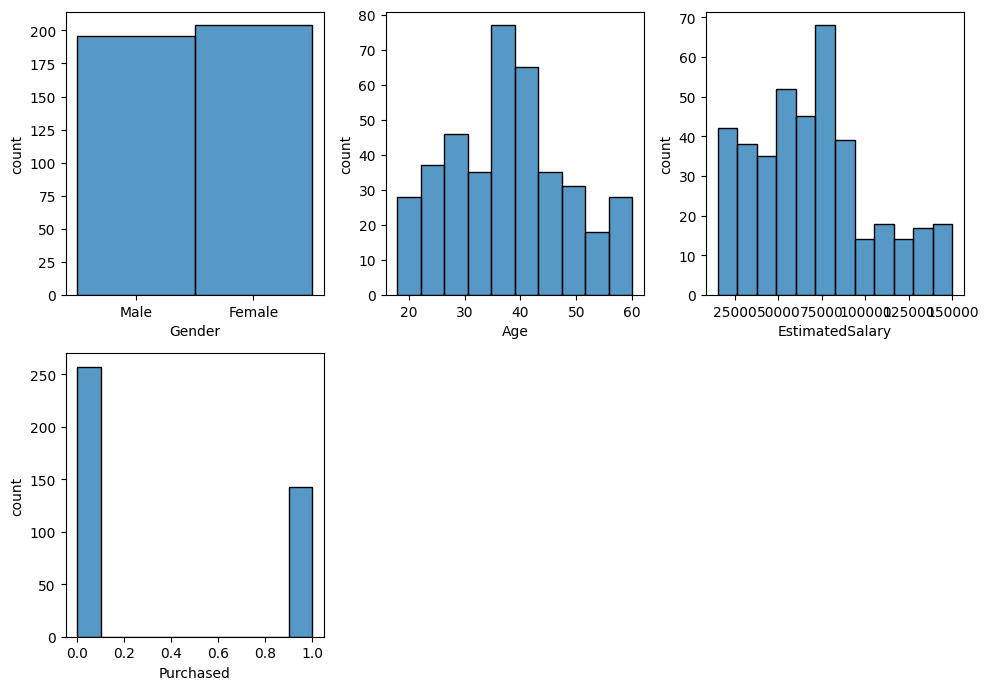

In [ ]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in ads:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(ads[column])
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

In [ ]:
# show intgers attributes types
numerical_attribute=ads.select_dtypes(include=['int64']).columns
numerical_attribute

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
# show categorical attributes types
categorical_attribute=ads.select_dtypes(include=['object']).columns
categorical_attribute

Index(['Gender'], dtype='object')

In [ ]:
# handle categorical data Male=1 , Female=0
ads.Gender.replace({'Male':1,'Female':0}, inplace=True)
ads.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


 pairplot: data visualization library that allows you to plot pairwise relationships between variables within a data set.

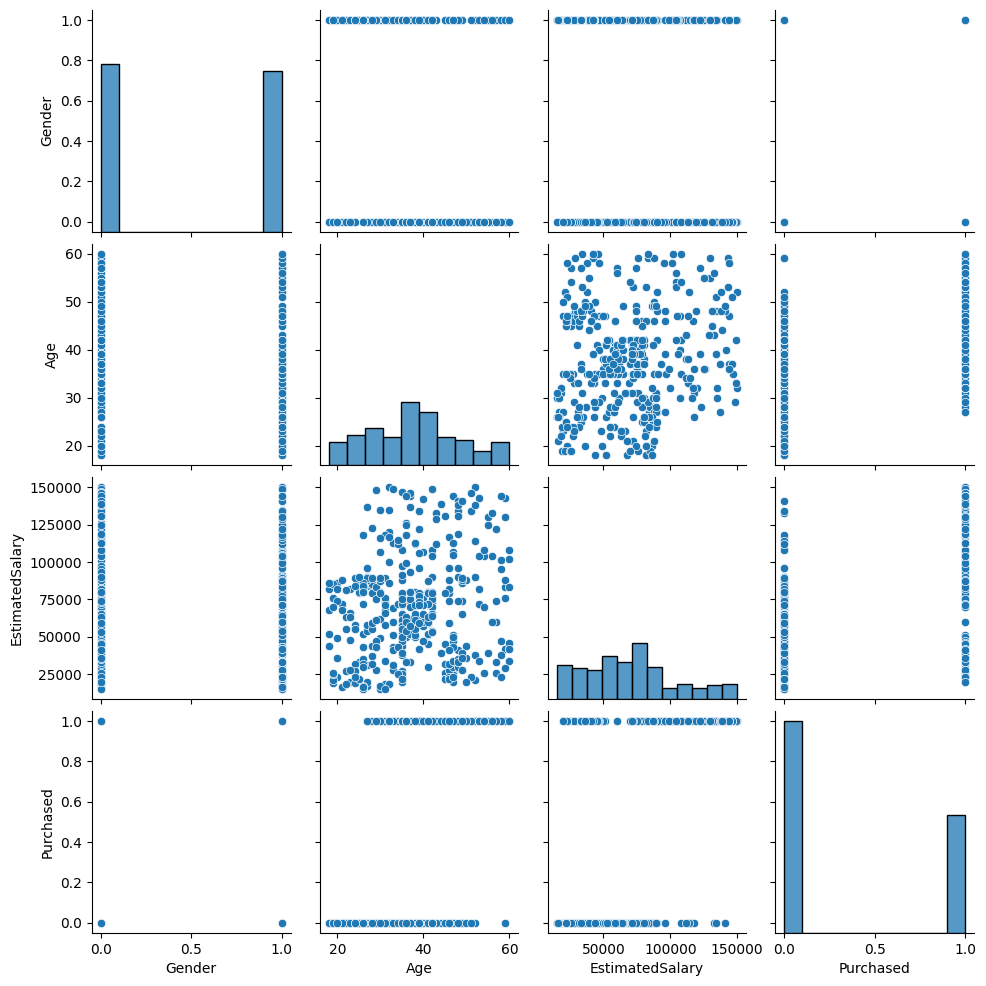

In [ ]:
sns.pairplot(ads)


-------------------------------------------------------
**Split the dataset into train and test with test size of 25%**



1. **Data Splitting:** It uses train_test_split to divide the dataset into training and testing subsets. The features (X) are obtained by dropping the target column, and the target labels (y) are extracted from the 'target' column.

2. ** Printing Training Instances:** It prints the number of instances in the training set using the shape attribute of X_train

3. **Printing Testing Instances: **It prints the number of instances in the testing set using the shape attribute of X_test.







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ads.drop('Purchased',axis=1), ads['Purchased'], test_size = 0.25, random_state = 0)
print("Number of instances in train "+ str(X_train.shape[0]))
print("Number of instances in test "+ str(X_test.shape[0]))


Number of instances in train 300
Number of instances in test 100


-------------
**Data Preprocessing**

Scaling ensures that all features in a dataset are on the same scale, preventing one feature from dominating others. For instance, without scaling, estimated salary might overshadow age.
- transform(): Apply the learned transformation to new data
- fit_transform(): Learn the parameters and apply the transformation to new data




In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train2 = pd.DataFrame(X_train)
X_train2.columns = ['gender', 'age', 'salary']
print(X_train2.head())

     gender       age    salary
0 -0.980196  0.581649 -0.886707
1  1.020204 -0.606738  1.461738
2 -0.980196 -0.012544 -0.567782
3 -0.980196 -0.606738  1.896635
4 -0.980196  1.373907 -1.408584


-----------------------
**Training and Prediction Model using SVM**

Train and fit the data using SVM - linearly

by from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

 Predict using the trained SVM  on the training data and
 testing data



In [ ]:
train_predict = model.predict(X_train) # the predicted values on the training
test_predict = model.predict(X_test) # the predicted values on the testing


----------------------
**Evaluation**

In [ ]:
print(f'Accuracy on training data: {accuracy_score(y_train, train_predict) * 100:.2f}%')
print(classification_report(y_train, train_predict))

print(f'Accuracy on test data: {accuracy_score(y_test, test_predict) * 100:.2f}%')
print(classification_report(y_test, test_predict))



Accuracy on training data: 82.33%
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       189
           1       0.83      0.66      0.73       111

    accuracy                           0.82       300
   macro avg       0.83      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300

Accuracy on test data: 89.00%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



_____________________
**Print the confusion matrix of train and test**
this function,
print train confusion matrix and
Display the confusion matrix for the training set and
Print test confusion matrix and
Display the confusion matrix for the test set before prunning.

Train Confusion matrix


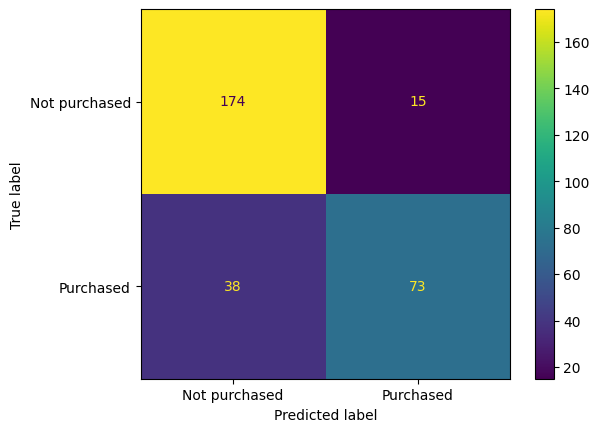

Test Confusion matrix


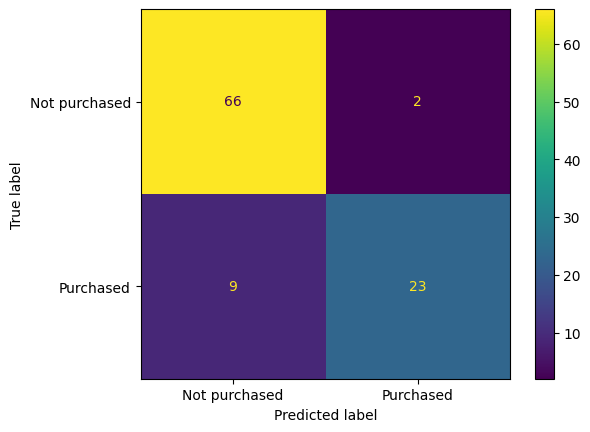

In [ ]:
print("Train Confusion matrix")
confusion_matrix_print(y_train, train_predict, model)
print("Test Confusion matrix")
confusion_matrix_print(y_test, test_predict, model)

**3D visualization of Gender, Age and EstimatedSalary**

In [ ]:
print("Train visualisation on three attributes")
visualise(X_train,y_train)
print("Test visualisation on three attributes")
visualise(X_test,y_test)


Train visualisation on three attributes


Test visualisation on three attributes


## `Best Hyperparameter tuning for SVM`
GridSearchCV tries all combinations of hyperparameters one by one into the model and check the result then choose the best results among them.
- C: trade-off between increasing the margin size and ensuring that the training points lie on the correct side of the margin.small c = large margin, large c = small margin(overfitting).
- gamma: gsmall = the model is too constrained. large = exactly fit the training (overfitting).
- kernel: set of mathematical functions for creating a optimal decision boundary.

In [ ]:
params = {'C':range(1,50),
          'gamma':range(1, 10),
          'kernel': ('linear', 'rbf')}

gcv =GridSearchCV(estimator=SVC(), param_grid=params)
gcv.fit(X_train,y_train)
gcv.best_estimator_

print('Best parameters:', gcv.best_params_)


Best parameters: {'C': 4, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)  # the predicted values on the training
y_test_pred = model.predict(X_test) # the predicted values on the testing

print(f'Accuracy on train data after pruning: {accuracy_score(y_train_pred,y_train) * 100:.2f}%')
print(classification_report(y_train_pred, y_train))

print(f'Accuracy on test data after pruning: {accuracy_score(y_test_pred,y_test) * 100:.2f}%')
print(classification_report(y_test_pred, y_test))


Accuracy on train data after pruning: 93.00%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       182
           1       0.94      0.88      0.91       118

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300

Accuracy on test data after pruning: 93.00%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.91      0.88      0.89        33

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Calculate the confusion matrix and Print the confusion matrix and
Extract individual values from the confusion matrix and
Print the counts of true positives, false positives, true negatives, and false negatives

Train Confusion matrix


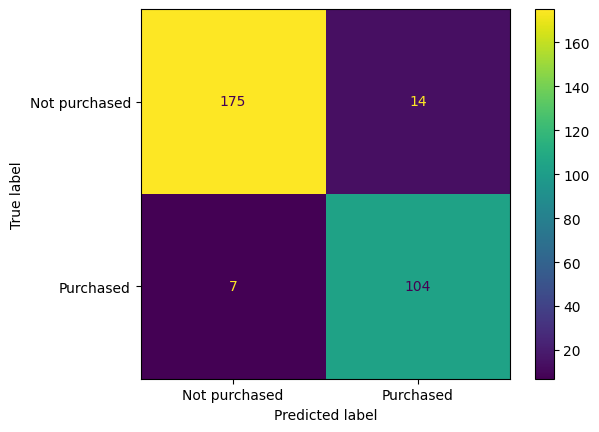

Test Confusion matrix


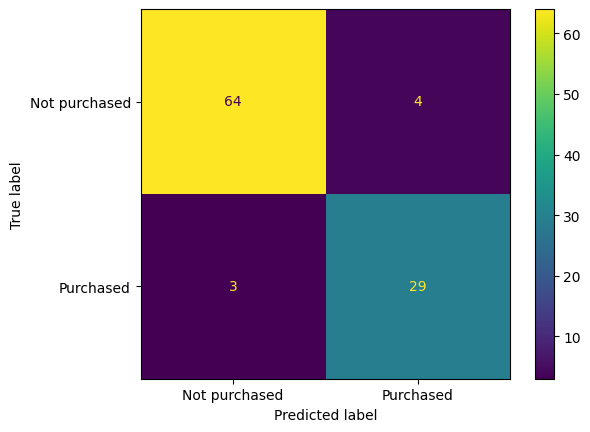

In [ ]:
print("Train Confusion matrix")
confusion_matrix_print(y_train, y_train_pred, model)
print("Test Confusion matrix")
confusion_matrix_print(y_test, y_test_pred, model)

The new best parameter with RBF (non-linear) shows highly improvement in 93% accuracy compared to the previous linear with 89% accuracy